In [6]:
import pandas as pd
import nltk
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
from urllib.request import urlopen
from urllib.request import Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

pd.set_option('display.max_colwidth', 25)

def get_news():
    try:
        # Find news table
        news = pd.read_html(str(html), attrs = {'class': 'fullview-news-outer'})[0]
        links = []
        for a in html.find_all('a', class_="tab-link-news"):
            links.append(a['href'])
        
        # Clean up news dataframe
        news.columns = ['Date', 'Headline']
#        news['Article Link'] = links
#        news = news.set_index('Date')
        return news

    except Exception as e:
        return e

def remove_stopwords(news_df):
    stop_words = set(stopwords.words('english'))
    for ind in range(0,len(news_df.index)):
        word_tokens = word_tokenize(news_df['Headline'][ind])
        filtered_sentence = []
        
        for w in word_tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
        new_string = ' '.join(filtered_sentence)
        news_df['Headline'][ind] = new_string
    
sentiment_score_dict = {}

# Input
symbol = ['GOOG','AMZN']

# Set up scraper
for i in range(0,len(symbol)):
    url = ("http://finviz.com/quote.ashx?t=" + symbol[i].lower())
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    html = soup(webpage, "html.parser")
    
    news = get_news()
    remove_stopwords(news)
    print(news)
    analyzer = SentimentIntensityAnalyzer()
    scores = news['Headline'].apply(analyzer.polarity_scores).tolist()
    df_scores = pd.DataFrame(scores)
    news = news.join(df_scores, rsuffix='_right')
    sentiment_score = sum(news['compound'])/len(news['compound'])
    sentiment_score_dict[symbol[i]] = sentiment_score
    print('Average Sentiment Score for '+str(symbol[i])+': '+str(sentiment_score))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arjungopalamin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                  Date                  Headline
0    Mar-17-23 05:17PM  YouTube Restores Dona...
1              05:05PM  Former Pres . Trump r...
2              01:21PM  Meta pushing metavers...
3              10:18AM  YouTube TV raises mon...
4              09:14AM  Analyst Report : Alph...
..                 ...                       ...
98             02:53PM  Uber , Spurred Hardwa...
99             10:19AM  Super Bowl LVII : The...
100            08:32AM  Amazon , Microsoft , ...
101            08:03AM  Uber Signs Cloud Deal...
102  Feb-11-23 11:15AM  Big Oil raked record ...

[103 rows x 2 columns]
Average Sentiment Score for GOOG: 0.04321359223300974
                  Date                  Headline
0    Mar-17-23 04:54PM  Best FAANG Stock Buy ...
1              04:35PM  Four Reasons Why Self...
2              12:05PM  37 Mistakes We Make W...
3              09:25AM  2 Stocks That Could J...
4              08:00AM  Could Shopify Really ...
..                 ...                  

In [85]:
print(sentiment_score_dict)

{'GOOG': 0.04631650485436895, 'TSLA': -0.015276699029126213, 'AAPL': 0.023495145631067964, 'SPY': 0.12408446601941747, 'SI': -0.1463669902912621, 'BIRD': -0.0655495145631068}


In [86]:
sentiment_score_df = pd.DataFrame.from_dict(sentiment_score_dict,orient = 'index')

In [87]:
sentiment_score_df.columns = ['Ticker Name']
print(sentiment_score_df)

      Ticker Name
GOOG     0.046317
TSLA    -0.015277
AAPL     0.023495
SPY      0.124084
SI      -0.146367
BIRD    -0.065550


In [ ]:
#Displaying Findings

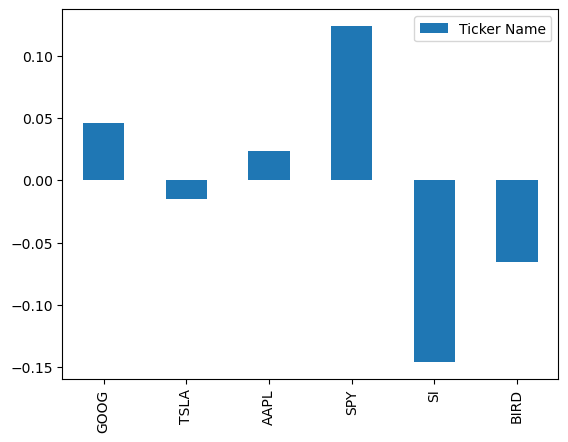

In [89]:
chart = sentiment_score_df.plot.bar()